<a href="https://colab.research.google.com/github/Elakkiyasivadevan/PRODIGY_DS_01/blob/main/Prodigy_DS_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("PopulationData.csv")

In [5]:
print(df)

                    Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL      54922.0      55578.0      56320.0      57002.0   
1      SP.POP.TOTL  130072080.0  13

In [8]:
population_2021 = df[["Country Name", "2021"]].dropna()
population_2021["2021"] = pd.to_numeric(population_2021["2021"], errors="coerce")
population_2021 = population_2021.dropna()

LINE PLOT

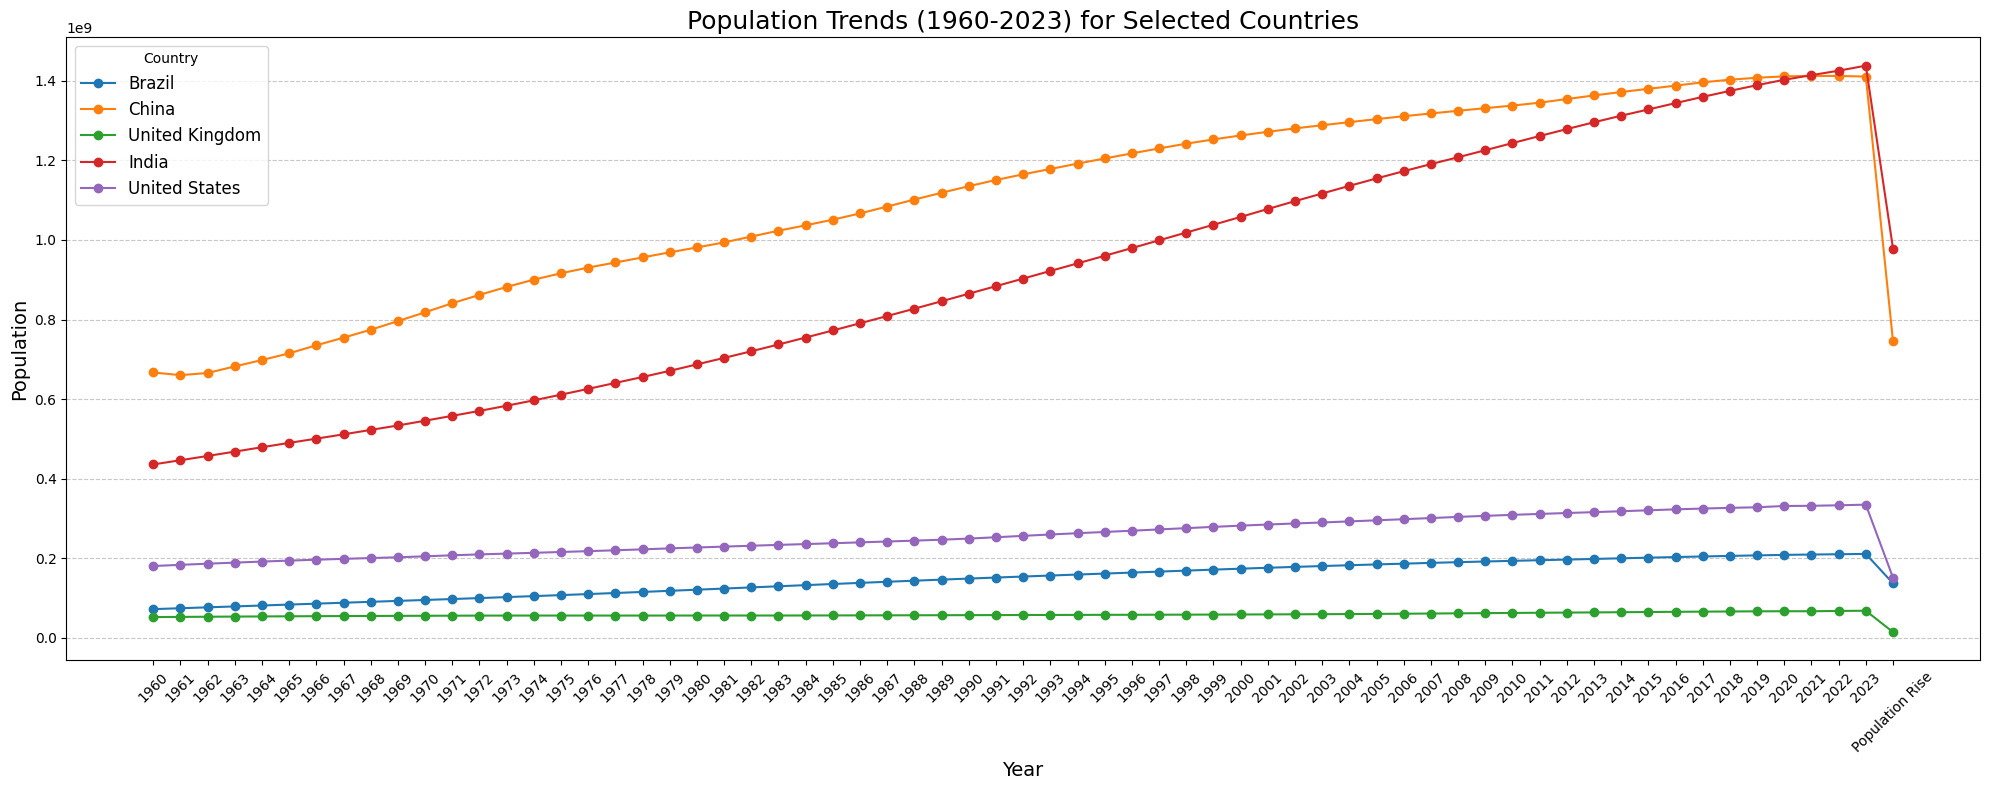

In [25]:
# Filter data for selected countries and years
selected_countries = df[df["Country Name"].isin(["India", "China", "United States", "Brazil", "United Kingdom"])]

# Convert population columns (1960-2023) to numeric
population_years = selected_countries.iloc[:, 4:].apply(pd.to_numeric, errors="coerce").T
population_years.columns = selected_countries["Country Name"]

# Plot population trends over the years
plt.figure(figsize=(20, 8))
for country in population_years.columns:
    plt.plot(population_years.index, population_years[country], label=country, marker="o")

# Customize x-axis to limit it to only years from 1960 to 2023 (and remove any extra labels)
plt.xticks(population_years.index, rotation=45)

# Add labels and title
plt.title("Population Trends (1960-2023) for Selected Countries", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.legend(title="Country", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


LINE PLOT

<ipython-input-37-e201aa2b016b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_countries["Total Population (1960-2023)"] = population_total


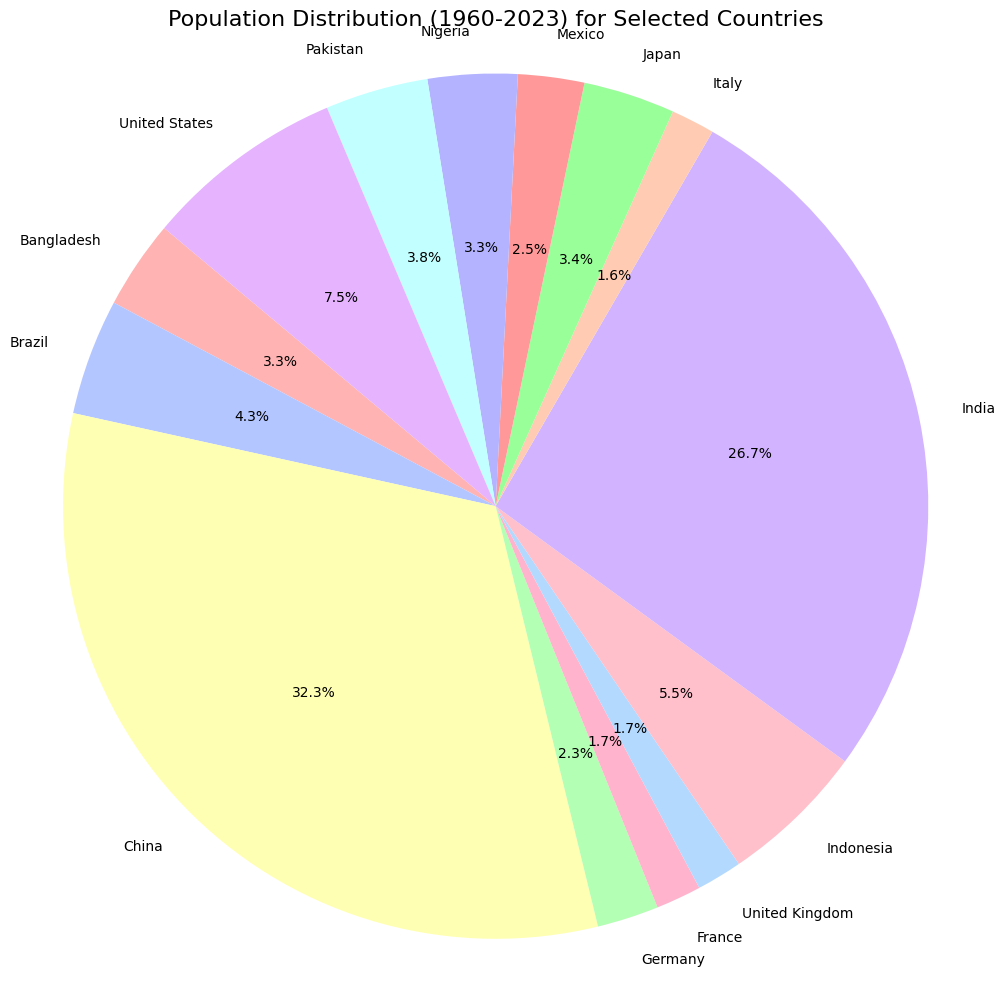

In [37]:
# Filter data for selected countries (you can modify this list)
selected_countries = df[df["Country Name"].isin(["India", "China", "United States", "Brazil", "United Kingdom",
                                                 "Germany", "Indonesia", "Mexico", "Russia", "Japan",
                                                 "Nigeria", "Pakistan", "Bangladesh", "France", "Italy"])]

# Sum the population across all years (1960-2023) for each country
population_total = selected_countries.iloc[:, 4:].apply(pd.to_numeric, errors="coerce").sum(axis=1)

# Add total population for each country to the DataFrame
selected_countries["Total Population (1960-2023)"] = population_total

# Define lighter colors (light versions of primary and secondary colors)
lighter_colors = ['#FFB3B3', '#B3C6FF', '#FFFFB3', '#B3FFB3', '#FFB3CC', '#B3D9FF', 'pink', '#D1B3FF',
                  '#FFCCB3', '#99FF99', '#FF9999', '#B3B3FF', '#C2FFFF', '#E6B3FF', '#B3FFCC']

# Create pie chart for the population distribution across selected countries
plt.figure(figsize=(10, 10))
plt.pie(selected_countries["Total Population (1960-2023)"], labels=selected_countries["Country Name"],
        autopct="%1.1f%%", startangle=140, colors=lighter_colors[:len(selected_countries)])
plt.title("Population Distribution (1960-2023) for Selected Countries", fontsize=16)
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is a circle.
plt.tight_layout()
plt.show()
